In [ ]:
# Install NLTK
!pip install nltk

# Import necessary libraries
import nltk
import os
import zipfile
nltk.download('punkt')
nltk.download('punkt_tab')
# Check NLTK version
print(nltk.__version__)

# Get current working directory
print(os.getcwd())

# Define the NLTK data path for tokenizers
nltk_path = os.path.expanduser("drive/nltk_data/tokenizers")
os.makedirs(nltk_path, exist_ok=True)
print(f"Created directory: {nltk_path}")

# Update NLTK data path
nltk.data.path.append(os.path.expanduser("drive/nltk_data"))
print("NLTK path updated!")

# Extract the 'punkt' tokenizer model from the zip file
with zipfile.ZipFile("punkt.zip", "r") as zip_ref:  # NLTK requires the punkt tokenizer model
    zip_ref.extractall(nltk_path)
    print("Extracted `punkt` successfully!")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


3.9.1
/content
Created directory: drive/nltk_data/tokenizers
NLTK path updated!


FileNotFoundError: [Errno 2] No such file or directory: 'punkt.zip'

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [1]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

# Download required resources
nltk.download('punkt')
nltk.download('stopwords')

# Original text
text = "Hi! My name is Ramandeep Singh."

# 1. Convert text to lowercase and remove punctuation
text_lower = text.lower()
text_clean = text_lower.translate(str.maketrans("", "", string.punctuation))
print(text_lower)

# 2. Tokenize and remove stopwords
tokens = word_tokenize(text_clean)
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word not in stop_words]

# 3. Display word frequency distribution
word_freq = Counter(filtered_tokens)

# Output
print("Filtered Tokens (without stopwords):", filtered_tokens)
print("\nWord Frequency Distribution:")
for word, freq in word_freq.items():
    print(f"{word}: {freq}")


[nltk_data] Downloading package punkt to C:\Users\raman/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\raman/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


hi! my name is ramandeep singh.
Filtered Tokens (without stopwords): ['hi', 'name', 'ramandeep', 'singh']

Word Frequency Distribution:
hi: 1
name: 1
ramandeep: 1
singh: 1


Q2. Using the same paragraph from Q1:

Extract all words with only alphabets using re.findall()

Remove stop words using NLTK’s stopword list

Perform stemming with PorterStemmer

Perform lemmatization with WordNetLemmatizer

Compare the stemmed and lemmatized outputs and explain when you’d prefer one over the other.

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer,WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

text = """Technology is evolving at a rapid pace, transforming the way we live, work, and communicate.
Artificial Intelligence is at the heart of many modern innovations. From voice assistants to self-driving cars,
the applications are limitless. Cloud computing and big data are enabling faster processing and better insights.
The future promises even more revolutionary advancements in this space."""

alphabets=re.findall(r'\b[a-zA-Z]+\b',text)
print(alphabets)

stop_words=set(stopwords.words('english'))
filtered_words=[word for word in words if word not in stop_words]
porter=PorterStemmer()
stem_word=[porter.stem(word) for word in filtered_words]
print(stem_word)

lema=WordNetLemmatizer()
lem_words=[lema.lemmatize(word) for word in filtered_words]
print(lem_words)
for i in range(min(10,len(filtered_words))):
    print(f"Original: {filtered_words[i]}, Stemmed: {stem_word[i]}, Lemmatized: {lem_words[i]}")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


['Technology', 'is', 'evolving', 'at', 'a', 'rapid', 'pace', 'transforming', 'the', 'way', 'we', 'live', 'work', 'and', 'communicate', 'Artificial', 'Intelligence', 'is', 'at', 'the', 'heart', 'of', 'many', 'modern', 'innovations', 'From', 'voice', 'assistants', 'to', 'self', 'driving', 'cars', 'the', 'applications', 'are', 'limitless', 'Cloud', 'computing', 'and', 'big', 'data', 'are', 'enabling', 'faster', 'processing', 'and', 'better', 'insights', 'The', 'future', 'promises', 'even', 'more', 'revolutionary', 'advancements', 'in', 'this', 'space']


NameError: name 'words' is not defined

Q3. Choose 3 short texts of your own (e.g., different news headlines, product reviews).

Use CountVectorizer to generate the Bag of Words representation.

Use TfidfVectorizer to compute TF-IDF scores.

Print and interpret the top 3 keywords from each text using TF-IDF.

In [ ]:

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np

texts = [
    "The new phone has an amazing camera and battery life.",
    "I love the user interface and design of this phone.",
    "Battery drains quickly, not satisfied with the product."
]
count_vector=CountVectorizer()
bow_matrix=count_vector.fit_transform(texts)
print(f"Bag of Words -> {count_vector.get_feature_names_out()}")

tfidf=TfidfVectorizer()
tfidfmatrix=tfidf.fit_transform(texts)
print(f"TF-IDF -> {tfidf.get_feature_names_out()}")
print(tfidfmatrix.toarray())
for i,row in enumerate(tfidfmatrix.toarray()):
  top_idx=row.argsort()[-3:][::-1]
  keywords=[(tfidf.get_feature_names_out()[idx],row[idx]) for idx in top_idx]
  print(keywords)

Bag of Words -> ['amazing' 'an' 'and' 'battery' 'camera' 'design' 'drains' 'has'
 'interface' 'life' 'love' 'new' 'not' 'of' 'phone' 'product' 'quickly'
 'satisfied' 'the' 'this' 'user' 'with']
TF-IDF -> ['amazing' 'an' 'and' 'battery' 'camera' 'design' 'drains' 'has'
 'interface' 'life' 'love' 'new' 'not' 'of' 'phone' 'product' 'quickly'
 'satisfied' 'the' 'this' 'user' 'with']
[[0.35171117 0.35171117 0.26748541 0.26748541 0.35171117 0.
  0.         0.35171117 0.         0.35171117 0.         0.35171117
  0.         0.         0.26748541 0.         0.         0.
  0.20772628 0.         0.         0.        ]
 [0.         0.         0.27760064 0.         0.         0.36501149
  0.         0.         0.36501149 0.         0.36501149 0.
  0.         0.36501149 0.27760064 0.         0.         0.
  0.21558166 0.36501149 0.36501149 0.        ]
 [0.         0.         0.         0.28895767 0.         0.
  0.37994462 0.         0.         0.         0.         0.
  0.37994462 0.         0.  

Q4. Write 2 short texts (4–6 lines each) describing two different technologies (e.g., AI vs Blockchain).

Preprocess and tokenize both texts.
Calculate:
a. Jaccard Similarity using sets

b. Cosine Similarity using TfidfVectorizer + cosine_similarity()

c. Analyze which similarity metric gives beƩer insights in your case.

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer,WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
text1 = "Artificial Intelligence enables machines to learn from data and perform tasks that require human intelligence."
text2 = "Blockchain is a decentralized technology that ensures secure and transparent transactions using distributed ledgers."
stop_words=set(stopwords.words('english'))
def preprocess(text):
  return [word for word in word_tokenize(text) if word.isalpha() and word not in stop_words]

tokens1=set(preprocess(text1))
tokens2=set(preprocess(text2))
intersection=tokens1.intersection(tokens2)
union=tokens1.union(tokens2)
jaccard_similiarity=len(intersection)/len(union)
print(f"Jaccard Similarity is {jaccard_similiarity}")

tfidf=TfidfVectorizer()
tfidfmatrix=tfidf.fit_transform([text1,text2])
cos_sim=cosine_similarity(tfidfmatrix[0:1],tfidfmatrix[1:2])[0][0]
print(f"Cosine Similarity is {cos_sim}")

Jaccard Similarity is 0.0
Cosine Similarity is 0.07300354822013207


Q5. Write a short review for a product or service.

Use TextBlob or VADER to find polarity & subjectivity for each review.

Classify reviews into Positive / Negative / Neutral.

Create a word cloud using the wordcloud library for all positive reviews.

Positive
Review :I love this phone! The camera is superb and performance is smooth.
Subjectivity:0.7000000000000001
Negative
Review :Not impressed. The battery life is terrible.
Subjectivity:1.0
Positive
Review :It's okay, nothing special but does the job.
Subjectivity:0.5357142857142857


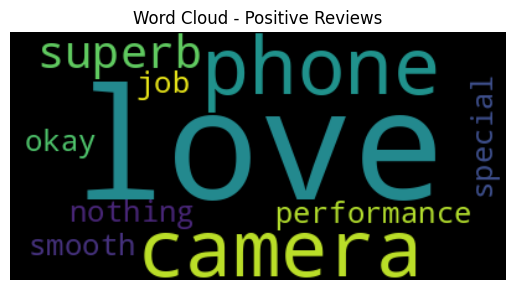

In [ ]:
from wordcloud import WordCloud
from textblob import TextBlob
import matplotlib.pyplot as plt
reviews = [
    "I love this phone! The camera is superb and performance is smooth.",
    "Not impressed. The battery life is terrible.",
    "It's okay, nothing special but does the job."
]
for review in reviews:
  blob=TextBlob(review)
  polarity=blob.sentiment.polarity;
  subjectivity=blob.sentiment.subjectivity
  if(polarity>0):
      print("Positive")
  elif(polarity<0):
      print("Negative")
  else:
      print("Neutral")

  print(f"Review :{review}")
  print(f"Subjectivity:{subjectivity}")

positive_reviews = " ".join([r for r in reviews if TextBlob(r).sentiment.polarity>0])
wordcloud=WordCloud().generate(positive_reviews)
plt.figure()
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud - Positive Reviews")
plt.show()

Q6. Choose your own paragraph (~100 words) as training data.

Tokenize text using Tokenizer() from keras.preprocessing.text

Create input sequences and build a simple LSTM or Dense model

Train the model and generate 2–3 new lines of text starting from any seed word you provide.

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

paragraph = """Artificial Intelligence is changing the future of every industry and every human being.
It has acted as the main driver of emerging technologies like big data, robotics and IoT.
With tools like ChatGPT and deep learning, machines now perform creative tasks like writing, designing and even coding.
AI systems can process vast amounts of data and identify patterns that humans might miss.
The development of neural networks has enabled significant breakthroughs in image recognition, natural language processing, and game playing.
Despite concerns about job displacement, AI is creating new opportunities and transforming existing roles.
Ethical considerations in AI development include privacy, bias, transparency, and ensuring systems align with human values."""

tokenizer = Tokenizer()
tokenizer.fit_on_texts([paragraph])
total_words = len(tokenizer.word_index) + 1

input_sequences = []
for i in range(1, len(paragraph.split())):
    n_gram_sequence = paragraph.lower().split()[:i+1]
    input_sequences.append(n_gram_sequence)

tokenized_sequences = []
for seq in input_sequences:
    token_list = tokenizer.texts_to_sequences([' '.join(seq)])[0]
    if token_list:
        tokenized_sequences.append(token_list)

max_seq_len = max([len(seq) for seq in tokenized_sequences])
input_sequences = pad_sequences(tokenized_sequences, maxlen=max_seq_len, padding='pre')

xs = input_sequences[:, :-1]
labels = input_sequences[:, -1]

ys = np.zeros((len(labels), total_words))
for i, label in enumerate(labels):
    ys[i, label] = 1

model = Sequential()
model.add(Embedding(total_words, 64, input_length=max_seq_len - 1))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)
model.fit(xs, ys, epochs=50, verbose=1, callbacks=[early_stopping])

def generate_text(seed_text, next_words=5):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text.lower()])[0]
        padded_token_list = pad_sequences([token_list], maxlen=max_seq_len - 1, padding='pre')
        predicted_probs = model.predict(padded_token_list, verbose=0)[0]
        top_indices = predicted_probs.argsort()[-3:][::-1]
        selected_index = np.random.choice(top_indices, p=predicted_probs[top_indices]/np.sum(predicted_probs[top_indices]))
        for word, idx in tokenizer.word_index.items():
            if idx == selected_index:
                output_word = word
                break
        seed_text += " " + output_word
    return seed_text

print("Generated from 'Artificial':")
print(generate_text("Artificial", next_words=7))
print("\nGenerated from 'Intelligence':")
print(generate_text("Intelligence", next_words=7))
print("\nGenerated from 'Neural networks':")
print(generate_text("Neural networks", next_words=7))

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 266ms/step - accuracy: 0.0334 - loss: 4.4550
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 265ms/step - accuracy: 0.0804 - loss: 4.4429
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 352ms/step - accuracy: 0.0773 - loss: 4.4226
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 484ms/step - accuracy: 0.0627 - loss: 4.3644
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 252ms/step - accuracy: 0.0773 - loss: 4.2773
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 261ms/step - accuracy: 0.0862 - loss: 4.1642
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 263ms/step - accuracy: 0.0809 - loss: 4.1303
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 264ms/step - accuracy: 0.0716 - loss: 4.1490
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 258ms/step - accuracy: 0.0726 - loss: 4.0231
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 273ms/step - accuracy: 0.0716 - loss: 3.9753
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 263ms/step - accuracy: 0.0961 - loss: 3.8583
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 263ms/step - accuracy: 0.0987 - loss: 3.8148
